### Table of contents



### Goals

This dataset contains information on credit card users and if they are considered to be at risk of default.

We are only going to be using the `test_data.csv` for this project.

The analysis will roughtly follow the following outline:
- get acquainted with the data
- clean up the data
- Find questions for analysis
- Analyse varibles and relationsships to find patterns and answer the questions

### Data

The data for this analysis was sourced from Kaggle

Source: [https://www.kaggle.com/datasets/tanayatipre/car-price-prediction-dataset](https://www.kaggle.com/datasets/tanayatipre/car-price-prediction-dataset)

A first insight on the dataset can be gained from Kaggle

#### Loading the data

Import the necessary libraries and datasets

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [193]:
credit_card_unclean = pd.read_csv("train_data.csv")

#### Data Outline

- We have 20 `columns`and 29165 `rows`
- Job title is the only column with missing / null values
- Age is recorded in days backwards
- Employment lenght is recorded in days backwards, negative if unemployed
- Account age is recorded in years backwards
- around 1.7% of accounts are at risk
- Has mobile phone is only 1, so it contains no information

In [194]:
credit_card_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [195]:
credit_card_unclean.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [196]:
credit_card_unclean.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [197]:
credit_card_unclean.nunique()

ID                     29165
Gender                     2
Has a car                  2
Has a property             2
Children count             9
Income                   259
Employment status          5
Education level            5
Marital status             5
Dwelling                   6
Age                     6794
Employment length       3483
Has a mobile phone         1
Has a work phone           2
Has a phone                2
Has an email               2
Job title                 18
Family member count       10
Account age               61
Is high risk               2
dtype: int64

### Data Cleaning

#### Remove unnessesary information

`Has a mobile phone` contains no information and will be removed

In [198]:
credit_card_unclean.drop("Has a mobile phone", axis = 1, inplace = True)

credit_card_unclean.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a work phone',
       'Has a phone', 'Has an email', 'Job title', 'Family member count',
       'Account age', 'Is high risk'],
      dtype='object')

#### Rename Columns

The colums have a lot of capital letters, spaces and unnesserary words.

We will give the `columns` clean names that are better for analysis.

In [199]:
credit_card_unclean.columns = ['id', 'gender', 'car', 'property', 'children',
       'income', 'employment_status', 'education', 'marital_status',
       'dwelling', 'age', 'employment_length', 'work_phone',
       'phone', 'email', 'job', 'family_size',
       'account_age', 'high_risk']

credit_card_unclean.columns

Index(['id', 'gender', 'car', 'property', 'children', 'income',
       'employment_status', 'education', 'marital_status', 'dwelling', 'age',
       'employment_length', 'work_phone', 'phone', 'email', 'job',
       'family_size', 'account_age', 'high_risk'],
      dtype='object')

#### Format Columns

- Turn columns with timeline by day to year
- `employment_length`, `age` and `account_age` from negative to positive

In [200]:
credit_card_unclean.age = -credit_card_unclean.age / 365.25
credit_card_unclean.account_age = -credit_card_unclean.account_age
credit_card_unclean.employment_length = -credit_card_unclean.employment_length / 365.25

credit_card_unclean.employment_length.describe()

count    29165.000000
mean      -162.238908
std        376.881269
min       -999.980835
25%          1.127995
50%          4.262834
75%          8.632444
max         43.019849
Name: employment_length, dtype: float64

#### Remove false data

In the `employment_length` column everyone unemployed has been unemployed for 1000 years. Let's add a column `employed` to see if someone is employed or not and set the unemployed data in `employment_length` to 0.

In [201]:
credit_card_unclean["employed"] = credit_card_unclean.employment_length < 0
credit_card_unclean.loc[credit_card_unclean["employment_length"] < 0, "employment_length"] = 0

credit_card_unclean.employment_length.describe()

credit_card_df = credit_card_unclean

### Exploratory Data Analysis

After some data cleaning and tidying, the DataFrame is ready for EDA. The following dependent variables will be focused on in the analysis:
* `high_risk`

The goals is to see how this dependent variable is correlated to the following independent variables:
* `gender`
* `car`
* `property`
* `children`
* `income`
* `employment_status`
* `education`
* `marital_status`
* `dwelling`
* `age`
* `employment_length`
* `work_phone`
* `phone`
* `email`
* `job`
* `family_size`
* `account_age`
* `employed`

The hope is that using summary statistics and visulizations, the following questions will be answered:
* What is most and least important to know for determining a clients credit card risk and how much does it affect it?

#### Big Picture

To observe all the numerical data at once, we use `DataFrame.hist()`. Within these distributions there are also 4 binary variables (0 False, 1 True):
- `work_phone`
- `phone`
- `email`
- `high_risk`

Almost all the others have a similar distribution with a right skew.

Next we create a heatmap to see what variables are most related to `high_risk`. We learn that increasing `account_age` seems to be the best predictor for higher risk, while `income` seems to not matter a lot and `employment_length` being the best negative predictor.

It's important to notice that no single variable seems to strongly affect the risk.

C:\Users\lasse\AppData\Local\Temp\ipykernel_19560\1806226831.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  credit_card_df.hist(ax = ax);


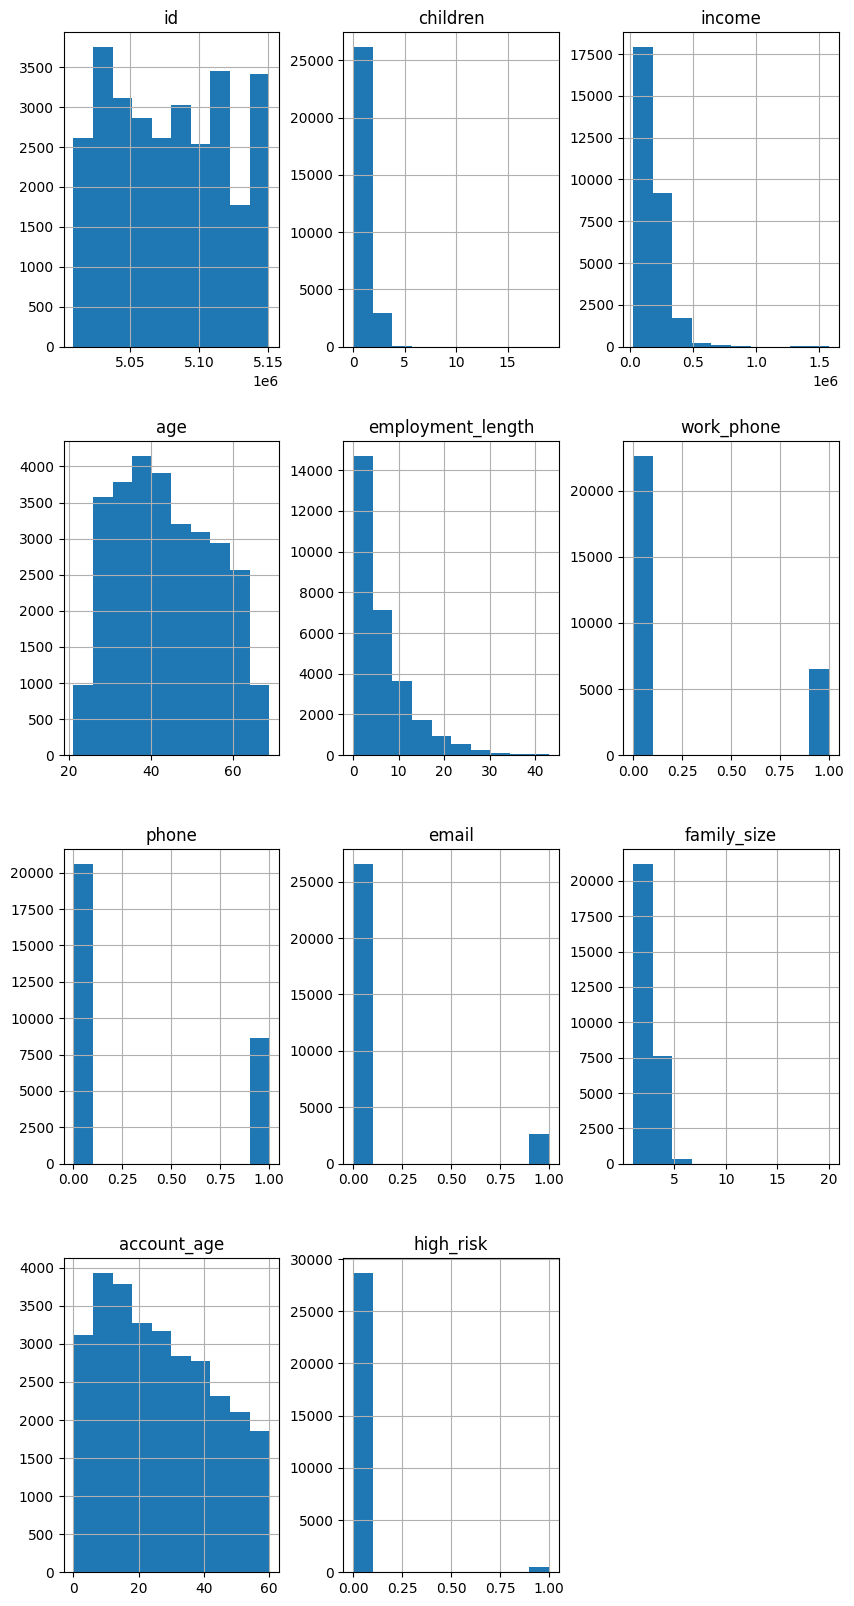

In [202]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
credit_card_df.hist(ax = ax);

In [207]:
credit_card_df.corr()

C:\Users\lasse\AppData\Local\Temp\ipykernel_19560\3975208802.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_card_df.corr()


,id,children,income,age,employment_length,work_phone,phone,email,family_size,account_age,high_risk,employed
id,1.000000,0.026291,-0.016257,-0.053120,-0.004394,0.085670,0.013915,-0.048210,0.024724,0.001453,0.011941,-0.037733
children,0.026291,1.000000,0.034991,-0.339080,0.042872,0.048727,-0.015110,0.015116,0.888676,0.003722,0.000369,-0.231427
income,-0.016257,0.034991,1.000000,-0.068156,0.087013,-0.036601,0.021516,0.091500,0.025338,0.016435,-0.001760,-0.169686
age,-0.053120,-0.339080,-0.068156,1.000000,-0.023283,-0.177483,0.027621,-0.104728,-0.301941,0.057467,-0.002422,0.620448
employment_length,-0.004394,0.042872,0.087013,-0.023283,1.000000,0.112727,0.045919,-0.003995,0.054093,0.073867,-0.027234,-0.418702
work_phone,0.085670,0.048727,-0.036601,-0.177483,0.112727,1.000000,0.312419,-0.035741,0.065130,0.009882,0.005115,-0.241888
phone,0.013915,-0.015110,0.021516,0.027621,0.045919,0.312419,1.000000,0.011367,-0.002008,0.013896,-0.000112,-0.011806
email,-0.048210,0.015116,0.091500,-0.104728,-0.003995,-0.035741,0.011367,1.000000,0.013759,-0.002588,-0.004659,-0.086376
family_size,0.024724,0.888676,0.025338,-0.301941,0.054093,0.065130,-0.002008,0.013759,1.000000,0.021693,-0.006252,-0.220789
account_age,0.001453,0.003722,0.016435,0.057467,0.073867,0.009882,0.013896,-0.002588,0.021693,1.000000,0.063273,-0.004403


C:\Users\lasse\AppData\Local\Temp\ipykernel_19560\3764111221.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_card_df.corr(), center=0, cmap=colors, robust=True)


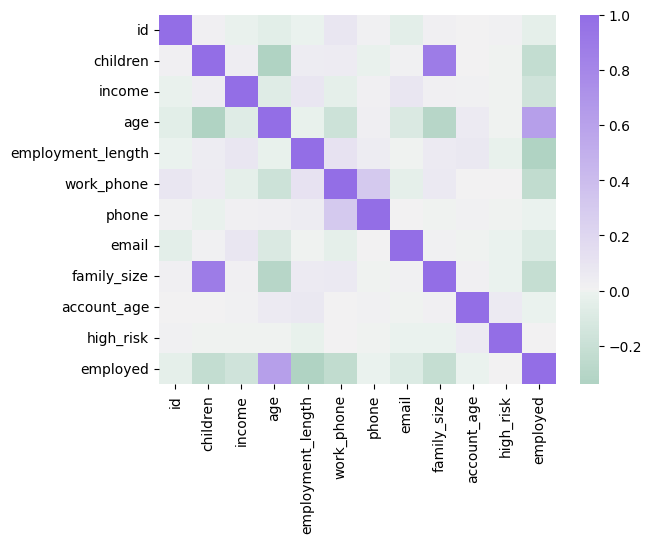

<Figure size 640x480 with 0 Axes>

In [206]:
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(credit_card_df.corr(), center=0, cmap=colors, robust=True)
plt.show()
plt.clf()

#### High Risk by Account Age

The best way to see the effect of `account_age` on `high_risk` is to see the difference in mean account_age by risk and make a boxplot of this.

We can see that the average account age for a low risk client is 26 years while the average account age for a high risk client is 34 year. A substantial difference of 8 years.

There also seem to be no accounts that are classified as high risk within the first 3 years of existing.

Average account age for a high risk client: 34.04408817635271
Average account age for a low risk client: 26.000104653596594


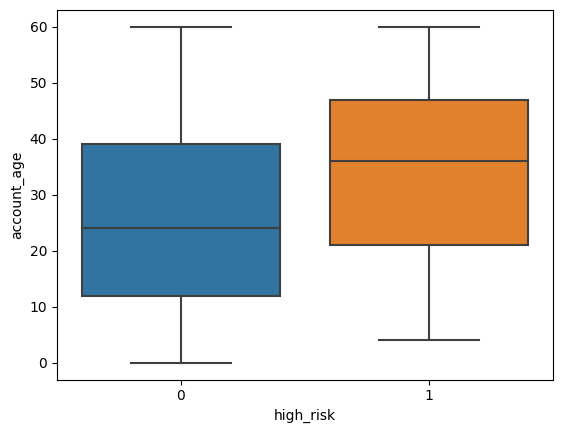

<Figure size 640x480 with 0 Axes>

In [210]:
high_risk_mean = credit_card_df[credit_card_df.high_risk == 1].account_age.mean()
low_risk_mean = credit_card_df[credit_card_df.high_risk == 0].account_age.mean()

print("Average account age for a high risk client:", high_risk_mean)
print("Average account age for a low risk client:", low_risk_mean)



#### High Risk by Income

Doing the same thing as in the last section with `income`, we barely see any difference.

The difference in the boxplot can likely also be put down to the fact that we have 50 times as many data points for low risk than for high risk, therefore we are less likely to see strong outliers in the high risk group.

Average income for a high risk client: 185537.2635270541
Average income for a low risk client: 186913.9396497593
Percentage difference: 0.742%


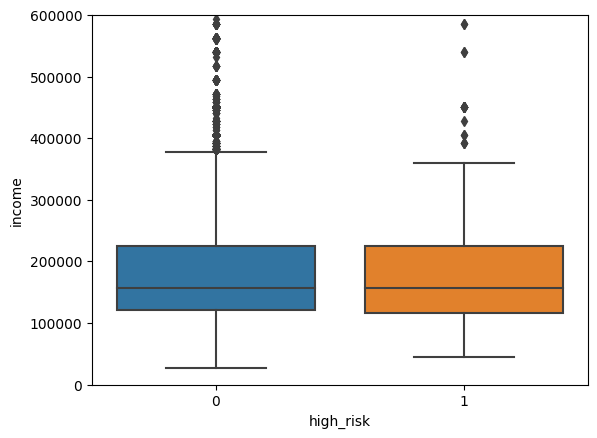

<Figure size 640x480 with 0 Axes>

In [224]:
high_risk_mean = credit_card_df[credit_card_df.high_risk == 1].income.mean()
low_risk_mean = credit_card_df[credit_card_df.high_risk == 0].income.mean()

print("Average income for a high risk client:", high_risk_mean)
print("Average income for a low risk client:", low_risk_mean)
print("Percentage difference: {0}%".format(round((((low_risk_mean / high_risk_mean) - 1) * 100), 4)))

sns.boxplot(x = credit_card_df.high_risk, y = credit_card_df.income)

plt.ylim(0, 600000)
plt.show()
plt.clf()

#### High Risk by Employment Length

We can see that `employment_length` is strongly negatively correlated with a clients risk.

While low risk clients are employed for an average of 6.1 years, high risk clients are employed for an average of 4.7 years. A difference of 29%.

Average years of employment for a high risk client: 4.701976163140793
Average years of employment for a low risk client: 6.065090764490822
Percentage difference: 28.9902%


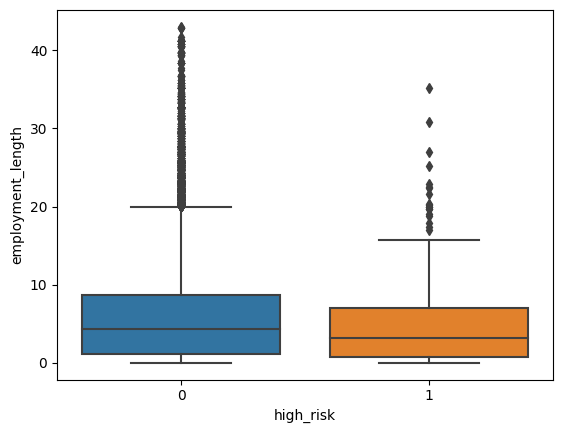

<Figure size 640x480 with 0 Axes>

In [228]:
high_risk_mean = credit_card_df[credit_card_df.high_risk == 1].employment_length.mean()
low_risk_mean = credit_card_df[credit_card_df.high_risk == 0].employment_length.mean()

print("Average years of employment for a high risk client:", high_risk_mean)
print("Average years of employment for a low risk client:", low_risk_mean)
print("Percentage difference: {0}%".format(round((((low_risk_mean / high_risk_mean) - 1) * 100), 4)))

sns.boxplot(x = credit_card_df.high_risk, y = credit_card_df.employment_length)

plt.show()
plt.clf()

#### Categorical EDA

Until now we have only explored the relationship of numerical varibles to high risk, now we will start looking at further variables, like:
- `education`
- `marital_status`
- `gender`
- `car`
- `property`
- `dwelling`

#### High Risk by Education

Roughly we can see that with increasing education, it becomes less likely for them to be high risk.

There are only 25 people with an academic degree in the dataset which makes the data of 0% of them being high risk unreliable.

In [240]:
lower_secondary = round(credit_card_df[credit_card_df.education == "Lower secondary"].high_risk.mean() * 100, 2)
secondary = round(credit_card_df[credit_card_df.education == "Secondary / secondary special"].high_risk.mean() * 100, 2)
incomplete_higher = round(credit_card_df[credit_card_df.education == "Incomplete higher"].high_risk.mean() * 100, 2)
higher_education = round(credit_card_df[credit_card_df.education == "Higher education"].high_risk.mean() * 100, 2)
academic_degree = round(credit_card_df[credit_card_df.education == "Academic degree"].high_risk.mean() * 100, 2)

print(lower_secondary, secondary, incomplete_higher, higher_education, academic_degree)
credit_card_df.education.unique()

3.02 1.67 2.13 1.71 0.0


array(['Secondary / secondary special', 'Higher education',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

#### High Risk by Marital Status

Widowed clients seem to be the most at risk followed by non-married individuals.

Married (both civil and traditional) and Seperated do not have much of a difference between them with all of them being less at risk than the average individual.

In [249]:
single = round(credit_card_df[credit_card_df.marital_status == "Single / not married"].high_risk.mean() * 100, 2)
married = round(credit_card_df[credit_card_df.marital_status == "Married"].high_risk.mean() * 100, 2)
civil = round(credit_card_df[credit_card_df.marital_status == "Civil marriage"].high_risk.mean() * 100, 2)
seperated = round(credit_card_df[credit_card_df.marital_status == "Separated"].high_risk.mean() * 100, 2)
widowed = round(credit_card_df[credit_card_df.marital_status == "Widow"].high_risk.mean() * 100, 2)

print(single, married, civil, seperated, widowed)
credit_card_df.marital_status.unique()

2.25 1.6 1.47 1.4 2.76


array(['Married', 'Single / not married', 'Separated', 'Civil marriage',
       'Widow'], dtype=object)

#### High Risk by Gender, Car, Property and Dwelling

The risk is substantialy higher for males than females.

There is only little difference between car owners and non-car owners.

There is substantialy more risk with people not owning a home than with people owning a home.

People living in an office apartment are most at risk followed by people living in municipal apartments.

The lowest risk people live either with their parents or in a co-op apartment.

In [258]:
m_risk = round(credit_card_df[credit_card_df.gender == "M"].high_risk.mean() * 100, 2)
f_risk = round(credit_card_df[credit_card_df.gender == "F"].high_risk.mean() * 100, 2)
car_risk = round(credit_card_df[credit_card_df.car == "Y"].high_risk.mean() * 100, 2)
no_car_risk = round(credit_card_df[credit_card_df.car == "N"].high_risk.mean() * 100, 2)
property_risk = round(credit_card_df[credit_card_df.property == "Y"].high_risk.mean() * 100, 2)
no_property_risk = round(credit_card_df[credit_card_df.property == "N"].high_risk.mean() * 100, 2)

parents = round(credit_card_df[credit_card_df.dwelling == "With parents"].high_risk.mean() * 100, 2)
municipal = round(credit_card_df[credit_card_df.dwelling == "Municipal apartment"].high_risk.mean() * 100, 2)
coop = round(credit_card_df[credit_card_df.dwelling == "Co-op apartment"].high_risk.mean() * 100, 2)
rented = round(credit_card_df[credit_card_df.dwelling == "Rented apartment"].high_risk.mean() * 100, 2)
office = round(credit_card_df[credit_card_df.dwelling == "Office apartment"].high_risk.mean() * 100, 2)
house = round(credit_card_df[credit_card_df.dwelling == "House / apartment"].high_risk.mean() * 100, 2)

print(m_risk, f_risk)
print(car_risk, no_car_risk)
print(property_risk, no_property_risk)
print(parents, municipal, coop, rented, office, house)
credit_card_df.dwelling.unique()

2.01 1.57
1.65 1.75
1.48 2.19
1.56 2.63 1.57 1.77 2.88 1.68


array(['With parents', 'House / apartment', 'Municipal apartment',
       'Rented apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

#### Collective EDA

Now that we have figure out a lot of the numeric and categorical variables that most affect if a client is high risk, we want to put a few of them together to see how much it changes a clients risk.

This can not be done with too many variables at once because our dataset is not large enough to still have a big enough sample size.

While no single one of the individual variables would make the risk above 3%, using the three combined, living in an office apartment, being male and not owning property, will put you at 7.35%, 4 times the average risk of 1.7%.

In contrast using the opposite of these three variables will put you at a risk of 1.51%, only around 0.2% below the average of 1.7%.

Putting categorical and numerical values together, account age over 40 years, years of employment under 5, living in an office apartment and not owning property, you get a risk of 17.65%.

The opposite, account age under 10 year, years of employment above 10, living with your parents and owning property, you get a risk of close to 0 (keep in mind there are only 7 people in this group which makes determining small likelyhoods rather difficult)

In [272]:
office_m_no_property = round(credit_card_df[(credit_card_df.dwelling == "Office apartment") & (credit_card_df.gender == "M") & (credit_card_df.property == "N")].high_risk.mean() * 100, 2)
print(office_m_no_property)

parents_f_property = round(credit_card_df[(credit_card_df.dwelling == "With parents") & (credit_card_df.gender == "F") & (credit_card_df.property == "Y")].high_risk.mean() * 100, 2)
print(parents_f_property)

office_no_property_account_employment = round(credit_card_df[(credit_card_df.dwelling == "Office apartment") & (credit_card_df.account_age > 40) & (credit_card_df.property == "N") & (credit_card_df.employment_length < 5)].high_risk.mean() * 100, 2)
print(office_no_property_account_employment)

parents_property_account_employment = round(credit_card_df[(credit_card_df.dwelling == "With parents") & (credit_card_df.account_age < 10) & (credit_card_df.property == "Y") & (credit_card_df.employment_length > 10)].high_risk.mean() * 100, 2)
print(parents_property_account_employment)

7.35
1.51
17.65
0.0
